In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
from utils.AntoineEquation import * 
from IPython.display import clear_output
from tqdm import tqdm
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive, Button, VBox, HBox, Output
from IPython.display import clear_output
import matplotlib.pyplot as plt


# Antoine Parameters for benzene
Ben_A = 4.72583
Ben_B = 1660.652
Ben_C = -1.461

# Antoine Parameters for toluene
Tol_A = 4.07827
Tol_B = 1343.943
Tol_C = -53.773

P_sys = 1.0325
# Create Antoine equations for benzene and toluene
benzene_antoine = AntoineEquationBase10(Ben_A, Ben_B, Ben_C)
toluene_antoine = AntoineEquationBase10(Tol_A, Tol_B, Tol_C)

# Create a Raoult's law object
vle_model = RaoultsLawModel(2, P_sys, [benzene_antoine, toluene_antoine])

# Define the sliders:
xD1_slider = widgets.FloatSlider(value=0.95, min=0.5, max=0.999, step=0.0001, description='$x_D$:', readout_format='.2f')
xB1_slider = widgets.FloatSlider(value=0.05, min=0.001, max=0.499, step=0.0001, description='$x_B$:', readout_format='.2f')
R1_slider =  widgets.FloatLogSlider(value=1.0, base=10, min=0, max=2, step=0.001,  description='Reflux Ratio:', readout_format='.1f')
go_button = widgets.Button(description='Create Model', width='15%', margin='0 10px 0 0')

def plot_distil_oplines_ex1(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value):
    plt.close('all')  # Ensure that any existing figures are closed before plotting a new one.
    distillation_model = DistillationModel(vle_model, xF = np.array([0.5, 0.5]), xD = np.array([xD, 1 - xD]), xB = np.array([xB, 1 - xB]), reflux = R)
    fig, axs = plt.subplots(2, 3, figsize=(15, 5), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    distillation_model.plot_distil_strip_binary(axs[0][0], axs[1][0])
    distillation_model.plot_distil_rect_binary(axs[0][1], axs[1][1])
    distillation_model.plot_distil_binary(axs[0][2], axs[1][2])
    plt.subplots_adjust(hspace=0)
    plt.show()  # Ensure the plot is displayed in Jupyter.


def plot_distil_stripping_ex1(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value):
    plt.close('all')  # Ensure that any existing figures are closed.
    fig, axs = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    distillation_model = DistillationModel(vle_model, xF=np.array([0.5, 0.5]), xD=np.array([xD, 1 - xD]), xB=np.array([xB, 1 - xB]), reflux=R)
    distillation_model.plot_distil_strip_binary(ax=axs[0], ax_fixed=axs[1])
    plt.subplots_adjust(hspace=0)
    plt.show()  # This is essential for the plot to be displayed in the Output widget in Jupyter.

def plot_distil_rectifying_ex1(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value):
    plt.close('all')  # Ensure that any existing figures are closed before plotting a new one.
    distillation_model = DistillationModel(vle_model, xF=np.array([0.5, 0.5]), xD=np.array([xD, 1 - xD]), xB=np.array([xB, 1 - xB]), reflux=R)
    fig, axs = plt.subplots(2, 1, figsize=(7, 7), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    distillation_model.plot_distil_rect_binary(ax=axs[0], ax_fixed=axs[1])
    plt.subplots_adjust(hspace=0)
    plt.show()  # Ensure the plot is displayed in Jupyter.

out_strip = Output()
out_rect = Output()
out_oplines = Output()

# Define the sliders:
xD2_slider = widgets.FloatSlider(value=0.95, min=0.5, max=0.999, step=0.0001, description='$x_D$:', readout_format='.2f')
xB2_slider = widgets.FloatSlider(value=0.05, min=0.001, max=0.499, step=0.0001, description='$x_B$:', readout_format='.2f')
r_max_slider = widgets.FloatSlider(value=1.0, min=0, max=100, step=1, description='R max:', readout_format='.1f')

def plot_r_vs_fixedpoints_ex_1(r_max = r_max_slider.value, xD=xD2_slider.value, xB=xB2_slider.value):
    clear_output(wait=True)
    display("Calculating... Please wait.")
    r_values = np.linspace(0.001, r_max, 100)
    x_fixed_r_arr = []
    x_fixed_s_arr = []

    for r in tqdm(r_values, desc="Progress"):
        distillation_model = DistillationModel(vle_model, xF=np.array([0.5, 0.5]), xD=np.array([xD, 1 - xD]), xB=np.array([xB, 1 - xB]), reflux=r)
        x_fixed_r, _ = distillation_model.find_rect_fixedpoints_binary(100)
        x_fixed_s, _ = distillation_model.find_strip_fixedpoints_binary(100)
        x_fixed_r_arr.append(x_fixed_r)
        x_fixed_s_arr.append(x_fixed_s)

    # flatten the lists and repeat the r_values according to the number of x values
    r_values_r = np.repeat(r_values, [len(x) for x in x_fixed_r_arr])
    r_values_s = np.repeat(r_values, [len(x) for x in x_fixed_s_arr])
    x_fixed_r_arr = np.hstack(x_fixed_r_arr)
    x_fixed_s_arr = np.hstack(x_fixed_s_arr)

    plt.scatter(r_values_r, x_fixed_r_arr,marker = 'x')
    plt.scatter(r_values_s, x_fixed_s_arr, marker ='x')
    plt.xlabel("Reflux Ratio")
    plt.ylabel("x")
    plt.show()
    

In [2]:
# Create your interactive widget but don't display it
strip_plot = interactive(plot_distil_stripping_ex1, xD=xD1_slider, xB=xB1_slider, R=R1_slider, continuous_update=False)

# Define your button click behavior
def on_go_button_click(b):
    with out_strip:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_distil_stripping_ex1(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value)

go_button = Button(description='Generate Plot')
go_button.on_click(on_go_button_click)

layout = VBox([HBox(strip_plot.children[:-1]), go_button, out_strip])
display(layout)




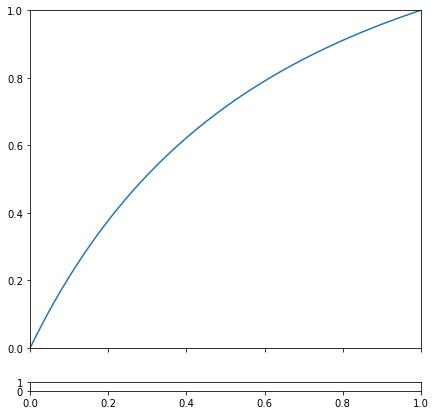

In [3]:
# Create your interactive widget but don't display it
rect_plot = interactive(plot_distil_rectifying_ex1, xD=xD1_slider, xB=xB1_slider, R=R1_slider, continuous_update=False)

# Define your button click behavior
def on_rect_button_click(b):
    with out_rect:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_distil_rectifying_ex1(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value)

rect_button = Button(description='Generate Plot')
rect_button.on_click(on_rect_button_click)

layout = VBox([HBox(rect_plot.children[:-1]), rect_button, out_rect])
display(layout)

In [4]:
# Create your interactive widget but don't display it
oplines_plot = interactive(plot_distil_oplines_ex1, xD=xD1_slider, xB=xB1_slider, R=R1_slider, continuous_update=False)

# Define your button click behavior
def on_oplines_button_click(b):
    with out_oplines:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_distil_oplines_ex1(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value)

oplines_button = Button(description='Generate Oplines Plot')
oplines_button.on_click(on_oplines_button_click)

layout_oplines = VBox([HBox(oplines_plot.children[:-1]), oplines_button, out_oplines])
display(layout_oplines)


In [5]:
# Create the interactive widget:
# fixed_points_reflux = widgets.interactive(plot_r_vs_fixedpoints_ex_1, xD=xD2_slider, xB=xB2_slider, r_max = r_max_slider) 

# Display the interactive widget:
# display(fixed_points_reflux)